In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import numpy as np
from tensorflow.keras.applications import vgg16
from keras.src.layers.pooling.average_pooling2d import AvgPool2D
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.models import Sequential
from keras.layers import Dense,Input,Flatten
from tensorflow.keras.utils import load_img,img_to_array
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

## Connecting to Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Data

In [36]:
!unzip '/content/drive/MyDrive/food.zip'

Streaming output truncated to the last 5000 lines.
  inflating: images/tacos/1026681.jpg  
  inflating: images/tacos/1030289.jpg  
  inflating: images/tacos/1033196.jpg  
  inflating: images/tacos/1036030.jpg  
  inflating: images/tacos/1042175.jpg  
  inflating: images/tacos/1044043.jpg  
  inflating: images/tacos/1058697.jpg  
  inflating: images/tacos/1059239.jpg  
  inflating: images/tacos/1059326.jpg  
  inflating: images/tacos/1066762.jpg  
  inflating: images/tacos/1070967.jpg  
  inflating: images/tacos/1073468.jpg  
  inflating: images/tacos/1075296.jpg  
  inflating: images/tacos/1085243.jpg  
  inflating: images/tacos/108529.jpg  
  inflating: images/tacos/1086014.jpg  
  inflating: images/tacos/108945.jpg  
  inflating: images/tacos/1089575.jpg  
  inflating: images/tacos/1091159.jpg  
  inflating: images/tacos/1101369.jpg  
  inflating: images/tacos/1109058.jpg  
  inflating: images/tacos/1109744.jpg  
  inflating: images/tacos/1119371.jpg  
  inflating: images/tacos/11237

In [37]:
values = ['macarons', 'french_toast', 'lobster_bisque', 'prime_rib', 'pork_chop', 'guacamole', 'baby_back_ribs', 'mussels', 'beef_carpaccio', 'poutine', 'hot_and_sour_soup', 'seaweed_salad', 'foie_gras', 'dumplings', 'peking_duck', 'takoyaki', 'bibimbap', 'falafel', 'pulled_pork_sandwich', 'lobster_roll_sandwich', 'carrot_cake', 'beet_salad', 'panna_cotta', 'donuts', 'red_velvet_cake', 'grilled_cheese_sandwich', 'cannoli', 'spring_rolls', 'shrimp_and_grits', 'clam_chowder', 'omelette', 'fried_calamari', 'caprese_salad', 'oysters', 'scallops', 'ramen', 'grilled_salmon', 'croque_madame', 'filet_mignon', 'hamburger', 'spaghetti_carbonara', 'miso_soup', 'bread_pudding', 'lasagna', 'crab_cakes', 'cheesecake', 'spaghetti_bolognese', 'cup_cakes', 'creme_brulee', 'waffles', 'fish_and_chips', 'paella', 'macaroni_and_cheese', 'chocolate_mousse', 'ravioli', 'chicken_curry', 'caesar_salad', 'nachos', 'tiramisu', 'frozen_yogurt', 'ice_cream', 'risotto', 'club_sandwich', 'strawberry_shortcake', 'steak', 'churros', 'garlic_bread', 'baklava', 'bruschetta', 'hummus', 'chicken_wings', 'greek_salad', 'tuna_tartare', 'chocolate_cake', 'gyoza', 'eggs_benedict', 'deviled_eggs', 'samosa', 'sushi', 'breakfast_burrito', 'ceviche', 'beef_tartare', 'apple_pie', '.DS_Store', 'huevos_rancheros', 'beignets', 'pizza', 'edamame', 'french_onion_soup', 'hot_dog', 'tacos', 'chicken_quesadilla', 'pho', 'gnocchi', 'pancakes', 'fried_rice', 'cheese_plate', 'onion_rings', 'escargots', 'sashimi', 'pad_thai', 'french_fries']
values.sort()
values = values[1:]
print(values)

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

In [38]:
print("Number of classes:",len(values))

Number of classes: 101


In [39]:
s = """Apple Pie: ~2.5 calories per gram
Baby Back Ribs: ~3.5 calories per gram
Baklava: ~5 calories per gram
Beef Carpaccio: ~2 calories per gram
Beef Tartare: ~2.5 calories per gram
Beet Salad: ~0.5 calories per gram
Beignets: ~3.5 calories per gram
Bibimbap: ~1.5 calories per gram
Bread Pudding: ~2.5 calories per gram
Breakfast Burrito: ~2 calories per gram
Bruschetta: ~1 calorie per gram
Caesar Salad: ~0.5 calories per gram
Cannoli: ~3.5 calories per gram
Caprese Salad: ~1 calorie per gram
Carrot Cake: ~3.5 calories per gram
Ceviche: ~0.5 calories per gram
Cheese Plate: ~3.5 calories per gram
Cheesecake: ~3.5 calories per gram
Chicken Curry: ~1.5 calories per gram
Chicken Quesadilla: ~2.5 calories per gram
Chicken Wings: ~3 calories per gram
Chocolate Cake: ~4 calories per gram
Chocolate Mousse: ~3 calories per gram
Churros: ~4 calories per gram
Clam Chowder: ~1.5 calories per gram
Club Sandwich: ~2.5 calories per gram
Crab Cakes: ~2 calories per gram
Creme Brulee: ~3.5 calories per gram
Croque Madame: ~3 calories per gram
Cupcakes: ~3.5 calories per gram
Deviled Eggs: ~1 calorie per gram
Donuts: ~4 calories per gram
Dumplings: ~2.5 calories per gram
Edamame: ~1 calorie per gram
Eggs Benedict: ~2.5 calories per gram
Escargots: ~1 calorie per gram
Falafel: ~2 calories per gram
Filet Mignon: ~2.5 calories per gram
Fish and Chips: ~2.5 calories per gram
Foie Gras: ~4.5 calories per gram
French Fries: ~3.5 calories per gram
French Onion Soup: ~1 calorie per gram
French Toast: ~2 calories per gram
Fried Calamari: ~2.5 calories per gram
Fried Rice: ~1.5 calories per gram
Frozen Yogurt: ~1 calorie per gram
Garlic Bread: ~4 calories per gram
Gnocchi: ~1.5 calories per gram
Greek Salad: ~0.5 calories per gram
Grilled Cheese Sandwich: ~3 calories per gram
Grilled Salmon: ~2 calories per gram
Guacamole: ~2 calories per gram
Gyoza: ~2 calories per gram
Hamburger: ~3.5 calories per gram
Hot and Sour Soup: ~0.5 calories per gram
Hot Dog: ~3.5 calories per gram
Huevos Rancheros: ~2 calories per gram
Hummus: ~1.5 calories per gram
Ice Cream: ~2 calories per gram
Lasagna: ~1.5 calories per gram
Lobster Bisque: ~1 calorie per gram
Lobster Roll Sandwich: ~2.5 calories per gram
Macaroni and Cheese: ~3 calories per gram
Macarons: ~4 calories per gram
Miso Soup: ~0.5 calories per gram
Mussels: ~0.5 calories per gram
Nachos: ~2.5 calories per gram
Omelette: ~1.5 calories per gram
Onion Rings: ~2.5 calories per gram
Oysters: ~0.5 calories per gram
Pad Thai: ~2 calories per gram
Paella: ~1.5 calories per gram
Pancakes: ~2 calories per gram
Panna Cotta: ~3.5 calories per gram
Peking Duck: ~4 calories per gram
Pho: ~1 calorie per gram
Pizza: ~2.5 calories per gram
Pork Chop: ~2.5 calories per gram
Poutine: ~2.5 calories per gram
Prime Rib: ~2.5 calories per gram
Pulled Pork Sandwich: ~2.5 calories per gram
Ramen: ~1 calorie per gram
Ravioli: ~1.5 calories per gram
Red Velvet Cake: ~4 calories per gram
Risotto: ~1.5 calories per gram
Samosa: ~2 calories per gram
Sashimi: ~1 calorie per gram
Scallops: ~1 calorie per gram
Seaweed Salad: ~0.5 calories per gram
Shrimp and Grits: ~2 calories per gram
Spaghetti Bolognese: ~1.5 calories per gram
Spaghetti Carbonara: ~2 calories per gram
Spring Rolls: ~1.5 calories per gram
Steak: ~2.5 calories per gram
Strawberry Shortcake: ~3.5 calories per gram
Sushi: ~1 calorie per gram
Tacos: ~2 calories per gram
Takoyaki: ~2.5 calories per gram
Tiramisu: ~3 calories per gram
Tuna Tartare: ~1.5 calories per gram
Waffles: ~2 calories per gram
"""
calories = s.splitlines()
s = "These values are approximations and can vary based on factors such as ingredients and cooking methods."

In [40]:
len(calories)

101

In [41]:
calories[0]

'Apple Pie: ~2.5 calories per gram'

In [42]:
print("First element:",values[0],"\nLast element:",values[-1])

First element: apple_pie 
Last element: waffles


In [43]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.1)
train_data = train_datagen.flow_from_directory('/content/drive/MyDrive/food/images',
                                               target_size=(224,224),
                                               batch_size=100,
                                               class_mode='categorical',
                                               shuffle=True,
                                               subset='training')
test_data = train_datagen.flow_from_directory('/content/drive/MyDrive/food/images',
                                               target_size=(224,224),
                                               batch_size=100,
                                               class_mode='categorical',
                                               shuffle=False,
                                               subset='validation')

Found 942 images belonging to 101 classes.
Found 104 images belonging to 101 classes.


In [44]:
print("Images Shape:",train_data.image_shape)

Images Shape: (224, 224, 3)


In [45]:
print('\nBatch Size:',100,
     "\nNunmber of Batches in training set:",len(train_data),
     "\nNunmber of Batches in testing set:",len(test_data),
     "\nNumber of Samples in training set:",train_data.samples,"Samples",
     "\nNumber of Samples in testing set:",test_data.samples,"Samples")


Batch Size: 100 
Nunmber of Batches in training set: 10 
Nunmber of Batches in testing set: 2 
Number of Samples in training set: 942 Samples 
Number of Samples in testing set: 104 Samples


In [46]:
print("\nThe 101 Classes numbers:\n",np.unique(train_data.labels),"\n",
       "_"*50,
       "\nThe 101 classes names:\n",train_data.class_indices,
      sep="")


The 101 Classes numbers:
[ 99 100]
__________________________________________________
The 101 classes names:
{'apple_pie': 0, 'baby_back_ribs': 1, 'baklava': 2, 'beef_carpaccio': 3, 'beef_tartare': 4, 'beet_salad': 5, 'beignets': 6, 'bibimbap': 7, 'bread_pudding': 8, 'breakfast_burrito': 9, 'bruschetta': 10, 'caesar_salad': 11, 'cannoli': 12, 'caprese_salad': 13, 'carrot_cake': 14, 'ceviche': 15, 'cheese_plate': 16, 'cheesecake': 17, 'chicken_curry': 18, 'chicken_quesadilla': 19, 'chicken_wings': 20, 'chocolate_cake': 21, 'chocolate_mousse': 22, 'churros': 23, 'clam_chowder': 24, 'club_sandwich': 25, 'crab_cakes': 26, 'creme_brulee': 27, 'croque_madame': 28, 'cup_cakes': 29, 'deviled_eggs': 30, 'donuts': 31, 'dumplings': 32, 'edamame': 33, 'eggs_benedict': 34, 'escargots': 35, 'falafel': 36, 'filet_mignon': 37, 'fish_and_chips': 38, 'foie_gras': 39, 'french_fries': 40, 'french_onion_soup': 41, 'french_toast': 42, 'fried_calamari': 43, 'fried_rice': 44, 'frozen_yogurt': 45, 'garlic_bre

In [47]:
train_data.image_shape

(224, 224, 3)

In [48]:
np.unique(train_data.labels)

array([ 99, 100], dtype=int32)

In [49]:
np.unique(test_data.labels)

array([ 99, 100], dtype=int32)

In [50]:
train_data.class_indices

{'apple_pie': 0,
 'baby_back_ribs': 1,
 'baklava': 2,
 'beef_carpaccio': 3,
 'beef_tartare': 4,
 'beet_salad': 5,
 'beignets': 6,
 'bibimbap': 7,
 'bread_pudding': 8,
 'breakfast_burrito': 9,
 'bruschetta': 10,
 'caesar_salad': 11,
 'cannoli': 12,
 'caprese_salad': 13,
 'carrot_cake': 14,
 'ceviche': 15,
 'cheese_plate': 16,
 'cheesecake': 17,
 'chicken_curry': 18,
 'chicken_quesadilla': 19,
 'chicken_wings': 20,
 'chocolate_cake': 21,
 'chocolate_mousse': 22,
 'churros': 23,
 'clam_chowder': 24,
 'club_sandwich': 25,
 'crab_cakes': 26,
 'creme_brulee': 27,
 'croque_madame': 28,
 'cup_cakes': 29,
 'deviled_eggs': 30,
 'donuts': 31,
 'dumplings': 32,
 'edamame': 33,
 'eggs_benedict': 34,
 'escargots': 35,
 'falafel': 36,
 'filet_mignon': 37,
 'fish_and_chips': 38,
 'foie_gras': 39,
 'french_fries': 40,
 'french_onion_soup': 41,
 'french_toast': 42,
 'fried_calamari': 43,
 'fried_rice': 44,
 'frozen_yogurt': 45,
 'garlic_bread': 46,
 'gnocchi': 47,
 'greek_salad': 48,
 'grilled_cheese_sa

VGG16 Model

In [51]:
from tensorflow.keras.applications import VGG19
vgg = VGG19(weights='imagenet', include_top=False, input_shape=(224,224,3))
vgg.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [52]:
for layer in vgg.layers:
    layer.trainable = False
vgg.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [53]:
model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(4000, activation='relu'))
model.add(Dense(4000, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(101, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 4000)              100356000 
                                                                 
 dense_4 (Dense)             (None, 4000)              16004000  
                                                                 
 dropout_1 (Dropout)         (None, 4000)              0         
                                                                 
 dense_5 (Dense)             (None, 101)               404101    
                                                                 
Total params: 136788485 (521.81 MB)
Trainable params: 

## Compiling Model

In [54]:
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

## Early Stopping

In [55]:
from tensorflow.keras.callbacks import EarlyStopping
results2 = model.fit(train_data, epochs=50, validation_data=test_data,
                  steps_per_epoch=len(train_data), validation_steps=len(test_data),
                  callbacks = EarlyStopping(patience=5, monitor='val_accuracy',restore_best_weights=True)
                  )

Epoch 1/50
10/10 [==============================] - 33s 3s/step - loss: 19.8655 - accuracy: 0.7516 - val_loss: 13.7472 - val_accuracy: 0.9615
Epoch 2/50
10/10 [==============================] - 27s 3s/step - loss: 6.6579 - accuracy: 0.8641 - val_loss: 1.0350 - val_accuracy: 0.9615
Epoch 3/50
10/10 [==============================] - 27s 3s/step - loss: 1.6977 - accuracy: 0.9554 - val_loss: 1.4042 - val_accuracy: 0.9615
Epoch 4/50
10/10 [==============================] - 27s 3s/step - loss: 0.3144 - accuracy: 0.9480 - val_loss: 0.4644 - val_accuracy: 0.9615
Epoch 5/50
10/10 [==============================] - 27s 3s/step - loss: 0.0703 - accuracy: 0.9830 - val_loss: 0.2592 - val_accuracy: 0.9519
Epoch 6/50
10/10 [==============================] - 28s 3s/step - loss: 0.0229 - accuracy: 0.9947 - val_loss: 0.2400 - val_accuracy: 0.9423


#Fitting the model

In [56]:
model.fit_generator(train_data,epochs=5)

<ipython-input-56-fd4c89a97472>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_data,epochs=5)


Epoch 1/5
10/10 [==============================] - 25s 2s/step - loss: 7.8361 - accuracy: 0.9554
Epoch 2/5
10/10 [==============================] - 25s 2s/step - loss: 0.5696 - accuracy: 0.8429
Epoch 3/5
10/10 [==============================] - 25s 3s/step - loss: 0.2081 - accuracy: 0.9575
Epoch 4/5
10/10 [==============================] - 25s 2s/step - loss: 0.0967 - accuracy: 0.9745
Epoch 5/5
10/10 [==============================] - 25s 2s/step - loss: 0.0129 - accuracy: 0.9926


## Evaluating the model

In [57]:
test_loss, test_accuracy = model.evaluate(test_data)
print("Testing Loss",test_loss)
print("Testing Accuracy",test_accuracy)

2/2 [==============================] - 3s 139ms/step - loss: 0.1866 - accuracy: 0.9519
Testing Loss 0.18660737574100494
Testing Accuracy 0.9519230723381042


Testing

In [58]:
import os
print(os.listdir("/content/drive/MyDrive/food/images"))

['waffles', 'tacos', 'takoyaki', 'tuna_tartare', 'sushi', 'tiramisu', 'spring_rolls', 'strawberry_shortcake', 'steak', 'spaghetti_carbonara', 'shrimp_and_grits', 'ravioli', 'seaweed_salad', 'sashimi', 'scallops', 'red_velvet_cake', 'samosa', 'risotto', 'spaghetti_bolognese', 'poutine', 'pancakes', 'ramen', 'pho', 'pork_chop', 'prime_rib', 'peking_duck', 'panna_cotta', 'pulled_pork_sandwich', 'pizza', 'nachos', 'mussels', 'paella', 'oysters', 'miso_soup', 'omelette', 'pad_thai', 'macaroni_and_cheese', 'onion_rings', 'macarons', 'hamburger', 'hot_and_sour_soup', 'lobster_bisque', 'lobster_roll_sandwich', 'lasagna', 'hummus', 'hot_dog', 'gyoza', 'huevos_rancheros', 'ice_cream', 'grilled_salmon', 'frozen_yogurt', 'fried_calamari', 'gnocchi', 'french_toast', 'fried_rice', 'guacamole', 'greek_salad', 'garlic_bread', 'grilled_cheese_sandwich', 'french_onion_soup', 'fish_and_chips', 'falafel', 'edamame', 'foie_gras', 'french_fries', 'filet_mignon', 'eggs_benedict', 'dumplings', 'escargots', 'c

Macarons Sample


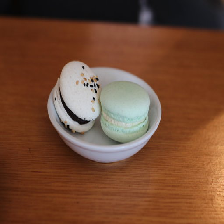

In [91]:
print("Macarons Sample")
macarons = load_img("/content/images/macarons/2421276.jpg",target_size=(224,224))
macarons

Pizza Sample


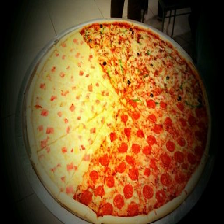

In [92]:
print("Pizza Sample")
pizza = load_img("/content/images/pizza/768276.jpg",target_size=(224,224,3))
pizza

Donuts Sample


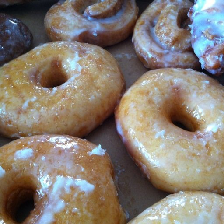

In [93]:
print("Donuts Sample")
donuts = load_img("/content/images/donuts/2563686.jpg",target_size=(224,224,3))
donuts

Frensh Toast Sample


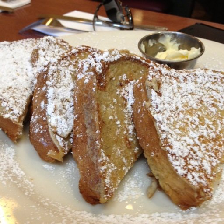

In [94]:
print("Frensh Toast Sample")
toast = load_img("/content/images/french_toast/2769309.jpg",target_size=(224,224,3))
toast

Ice Cream Sample


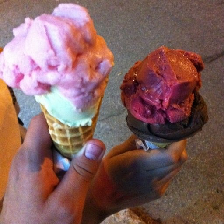

In [95]:
print("Ice Cream Sample")
ice = load_img("/content/images/ice_cream/579407.jpg",target_size=(224,224))
ice

French Fries


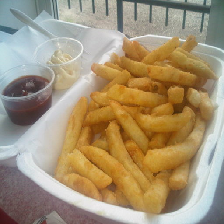

In [96]:
print("French Fries")
fries = load_img("/content/images/french_fries/100148.jpg",target_size=(224,224))
fries

Text(0.5, 1.0, 'Donuts')

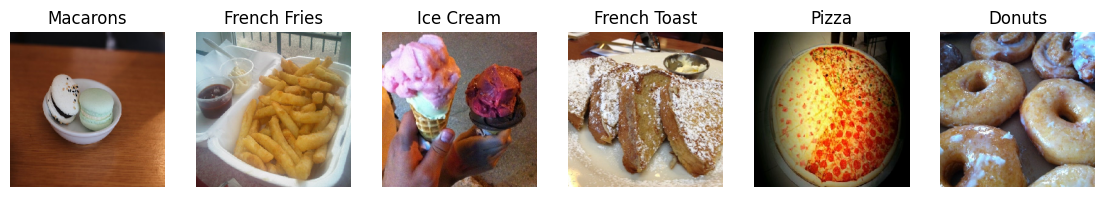

In [97]:
fig = plt.figure(figsize=(14,7))
plt.grid=False
fig.add_subplot(1, 6, 1)
plt.axis('off')
plt.imshow(macarons)
plt.title("Macarons")
# _____________________________________________
fig.add_subplot(1, 6, 2)
plt.axis('off')
plt.imshow(fries)
plt.title("French Fries")
# _____________________________________________
fig.add_subplot(1, 6, 3)
plt.axis('off')
plt.imshow(ice)
plt.title("Ice Cream")
# _____________________________________________
fig.add_subplot(1, 6, 4)
plt.axis('off')
plt.imshow(toast)
plt.title("French Toast")
# _____________________________________________
fig.add_subplot(1, 6, 5)
plt.axis('off')
plt.imshow(pizza)
plt.title("Pizza")
# _____________________________________________
fig.add_subplot(1, 6, 6)
plt.axis('off')
plt.imshow(donuts)
plt.title("Donuts")

## Reshaping Images

In [98]:
macarons = img_to_array(macarons)
fries = img_to_array(fries)
ice = img_to_array(ice)
pizza = img_to_array(pizza)
donuts = img_to_array(donuts)
toast = img_to_array(toast)
macarons = macarons/255
fries = fries/255
ice = ice/255
pizza = pizza/255
donuts = donuts/255
toast = toast/255
macarons = macarons.reshape(1,224,224,3)
fries = fries.reshape(1,224,224,3)
ice = ice.reshape(1,224,224,3)
pizza = pizza.reshape(1,224,224,3)
donuts = donuts.reshape(1,224,224,3)
toast = toast.reshape(1,224,224,3)

macarons.shape

(1, 224, 224, 3)

## Samples Predicting

In [99]:
p1 = (model.predict(macarons)).argmax()

print("Class ",p1,": ",values[p1],sep='')
print(calories[p1],'\nNote:',s)

1/1 [==============================] - 0s 124ms/step
Class 100: waffles
Waffles: ~2 calories per gram 
Note: These values are approximations and can vary based on factors such as ingredients and cooking methods.


In [100]:
p2 = (model.predict(fries)).argmax()

print("Class ",p2,": ",values[p2],sep='')
print(calories[p2],'\nNote:',s)

1/1 [==============================] - 0s 124ms/step
Class 100: waffles
Waffles: ~2 calories per gram 
Note: These values are approximations and can vary based on factors such as ingredients and cooking methods.
